# 1. Introduction: _Please enjoy your stay!_

Do people from different nationalities rate the same (Hilton) hotels differently?

A first step to answering this question is finding out whether there is a difference between nationality review scores across the Hilton chain as a whole. For these purposes, we will be working with a dataset of reviews for various hotels in Europe dated from 2015-2017 and scraped from Booking.com. More on that later on.

In our dataset, Hilton Worldwide Holdings received reviews for 43 of its hotels of both the DoubleTree and Hilton brands. They are the hotel group in our dataset with the highest review entries.

We will assume that there is a positive correlation between the number of reviews submitted by people of a given nationality and the number of actual staying guests of that nationality during during the two-year period of time we will be evaluating. Upon inspection, Hilton has roughly the same number of reviewers from the US and Canada on one side, and from Australia and New Zealand on the other. This seems unusual since Western Europe is approximately double the distance from Oceania as it is from North America. I would expect a significantly higher number of guests from North America due to lower travel costs and times, which would mean a significantly higher number of reviews.

One way to explain the small difference in visiting guests from these two parts of the world is that North Americans are having a less satisfying stay at the Hilton Hotels. Perhaps Americans have certain expectations about their hotel stays that Australians don't have, and that Hilton EU is not meeting. If this were the case, it would be reflected as a statistically significant difference in the average review scores left by these two groups. This would be interesting to Hilton business executives, because if there are significant differences in review scores between both groups, it could mean special attention needs to be paid to the unmet expectations of the lagging group in order to improve their experience with Hilton and improve customer loyalty. This would also allow them to tailor their marketing efforts to specific regions and fulfil their customers' most granular expectations.

For this study, I will be focusing on English-speaking countries for two reasons. Firstly, the location of these countries relative to Europe allows me to include distance as a factor that informs my hypothesis when compared to actual review entries per nationality (i.e. if Canada is closer to the UK than Australia is, yet visits the UK less than Australia, there might be a problem that shows as an average review score difference). Secondly, I believe a common language makes any insights gained from this study more translatable across markets, because language barriers (or the lack thereof) will be held constant across nationalities (i.e. if the reason why Americans have an unpleasant experience ordering room service in Paris is a language barrier, New Zealanders will tend to experience the same thing because they speak the same language).

# 2. Hypothesis

Ho: There is no significant difference between the average review score in North America (United States and Canada) versus that of English-speaking Oceania (Australia and New Zealand).

Ha: There is a significant difference between the average review score in North America (United States and Canada) versus that of English-speaking Oceania (Australia and New Zealand).

# 3. Data
The data comes from [Kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe) and contains 515,738 entries and 17 columns. It was originally scraped from [Booking.com](https://www.booking.com/) by the poster and was already publicly available data. There are 3,268 missing values under the latitude column, and 3,268 missing values under the longitude column. This is not a concern for us, since we will not be using those columns. There are no other missing values in our dataset.

35,490 of these records are reviews for Hilton Hotels. Of those, 1,202 are reviews by Americans, 967 are by Australians, 336 are by Canadians and 196 are by New Zealanders.

In [18]:
# Set up environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math
%matplotlib inline


reviews = pd.read_csv(r'C:\Users\sebar\Downloads\515k-hotel-reviews-data-in-europe\Hotel_Reviews.csv')


# Convert column headers to lowercase for ease of coding

reviews.columns = reviews.columns.str.lower()

In [2]:
# Evaluate the dataset's dimensions

print('Dataset shape: {}'.format(reviews.shape))

Dataset shape: (515738, 17)


In [3]:
reviews.info()

reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
# Check for null values

reviews.isna().sum()

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

# 4. Methods

For this analysis I will create two DataFrames: one containing all US and Canada reviews for Hilton Hotels and another containing all Australia and New Zealand reviews for these hotels. I am pairing countries up based on geographical proximity and to allow for a more interpretable and stable result with a larger sample size and only two groups.

Review distributions will probably not be normally distributed, exhibiting instead a positive, leptokurtic skew. I will check with a histogram as well as with skewness and kurtosis values. If the data turns out to be non-normally distributed, I will conduct a Kruskal-Wallis Test for independent samples.

In [5]:
# Filtering the dataset for Hilton hotels exclusively.

hilton = reviews[reviews['hotel_name'].str.contains('Hilton')]

# Visually vetting results

hilton.hotel_name.unique()

array(['Doubletree by Hilton London Kensington', 'Hilton Paris Opera',
       'Hilton London Hyde Park', 'Hilton London Paddington',
       'DoubleTree by Hilton London Hyde Park', 'Hilton London Euston',
       'Hilton London Bankside', 'DoubleTree by Hilton London Ealing',
       'DoubleTree by Hilton London Victoria', 'The Trafalgar Hilton',
       'London Hilton on Park Lane', 'Hilton London Metropole',
       'DoubleTree by Hilton London Docklands Riverside',
       'DoubleTree by Hilton London Westminster', 'Hilton London Olympia',
       'DoubleTree by Hilton Hotel London Marble Arch',
       'Hilton London Tower Bridge', 'Hilton London Angel Islington',
       'DoubleTree by Hilton London Islington',
       'DoubleTree by Hilton Hotel London Tower of London',
       'DoubleTree by Hilton London West End', 'The Waldorf Hilton',
       'Hilton Vienna', 'Hilton Amsterdam', 'Hilton Barcelona',
       'Doubletree By Hilton London Greenwich',
       'DoubleTree By Hilton London Excel

In [6]:
# Quick figures

print('Hilton Worldwide has {} review entries in this dataset.'.format(len(hilton)))

print('Hilton Worldwide operated {} hotels in Europe from 2015 to 2017.'.format(len(hilton.hotel_name.unique())))

print('Hilton Worldwide received reviews on Booking.com by guests from {} different nationalities between 2015 and 2017.'.format(len(hilton.reviewer_nationality.unique())))

Hilton Worldwide has 35490 review entries in this dataset.
Hilton Worldwide operated 43 hotels in Europe from 2015 to 2017.
Hilton Worldwide received reviews on Booking.com by guests from 156 different nationalities between 2015 and 2017.


In [7]:
# Groupby nationality

hilton.groupby(['reviewer_nationality']).agg('count').sort_values(by = 'hotel_address', ascending = False).head(25)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
reviewer_nationality,,,,,,,,,,,,,,,,
United Kingdom,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705,23705
United States of America,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202
Ireland,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
Australia,967,967,967,967,967,967,967,967,967,967,967,967,967,967,967,967
United Arab Emirates,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
Saudi Arabia,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
Netherlands,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362
Canada,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
Germany,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


In [8]:
# Split up our dataset

usa_can_reviews = hilton[hilton['reviewer_nationality'].isin([' United States of America ', ' Canada '])]
aus_nzl_reviews = hilton[hilton['reviewer_nationality'].isin([' Australia ', ' New Zealand '])]
countries_grouped = hilton[hilton['reviewer_nationality'].isin([' United States of America ', ' Canada ', ' Australia ', ' New Zealand '])]

print(usa_can_reviews.info())
print(aus_nzl_reviews.info())

# No missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 24607 to 481307
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   hotel_address                               1538 non-null   object 
 1   additional_number_of_scoring                1538 non-null   int64  
 2   review_date                                 1538 non-null   object 
 3   average_score                               1538 non-null   float64
 4   hotel_name                                  1538 non-null   object 
 5   reviewer_nationality                        1538 non-null   object 
 6   negative_review                             1538 non-null   object 
 7   review_total_negative_word_counts           1538 non-null   int64  
 8   total_number_of_reviews                     1538 non-null   int64  
 9   positive_review                             1538 non-null   object 
 10  review

Text(0, 0.5, 'Frequency')

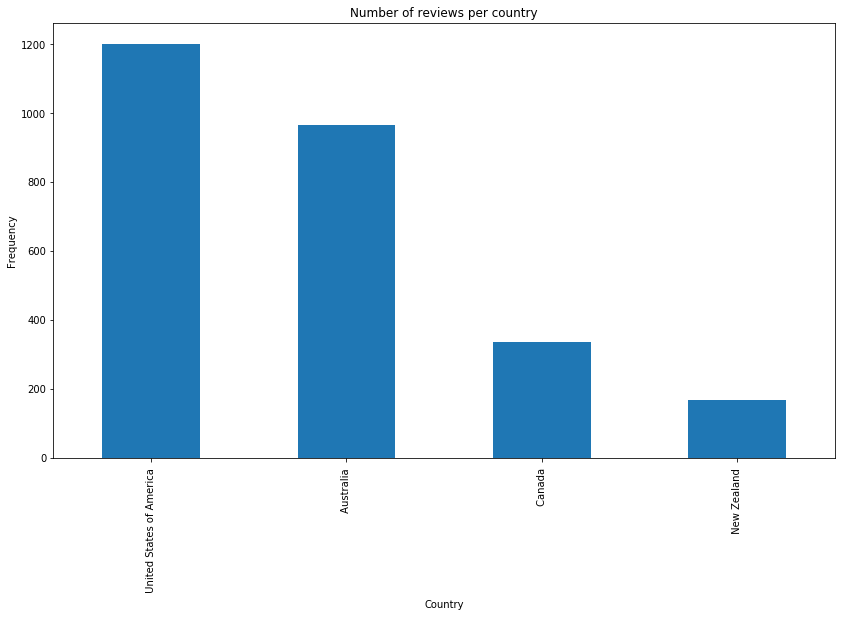

In [9]:
# Number of reviews per country

ax = countries_grouped['reviewer_nationality'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of reviews per country")
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")

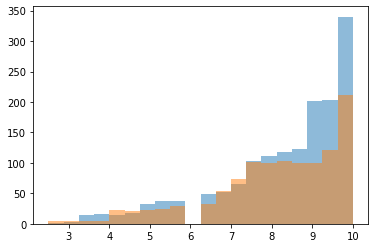

DescribeResult(nobs=1538, minmax=(2.5, 10.0), mean=8.364824447334199, variance=2.7364912183479375, skewness=-1.1281293969935688, kurtosis=0.643553102954876)
DescribeResult(nobs=1136, minmax=(2.5, 10.0), mean=8.133626760563379, variance=2.7700929143140782, skewness=-0.9110219490444146, kurtosis=0.32956629442330776)


In [10]:
# Plot the histogram

plt.hist(usa_can_reviews['reviewer_score'], bins = 20, alpha = .5)
plt.hist(aus_nzl_reviews['reviewer_score'], bins = 20, alpha = .5)
plt.show()

print(stats.describe(usa_can_reviews['reviewer_score']))
print(stats.describe(aus_nzl_reviews['reviewer_score']))

In [11]:
# Our independent groups are not normally distributed, so I will conduct the kruskal test.

stats.kruskal(
    usa_can_reviews['reviewer_score'],
    aus_nzl_reviews['reviewer_score']
)

# Based on the p-value, we can reject the null hypothesis. There is a statistically significant difference between the
# average scores North Americans give Hilton Hotels in Europe, and the scores than Australian and New Zealanders
# give them.

KruskalResult(statistic=17.47479786027042, pvalue=2.9114164519409932e-05)

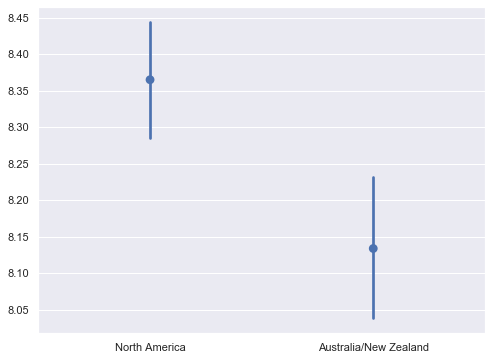

In [12]:
# Set figure size

sns.set(rc={'figure.figsize':(8,6)})

g = sns.pointplot(data=[usa_can_reviews['reviewer_score'],
                        aus_nzl_reviews['reviewer_score']], join=False)
                        
# Adding a semicolon means output won't render as a string

g.set(xticklabels = ['North America', 'Australia/New Zealand']);

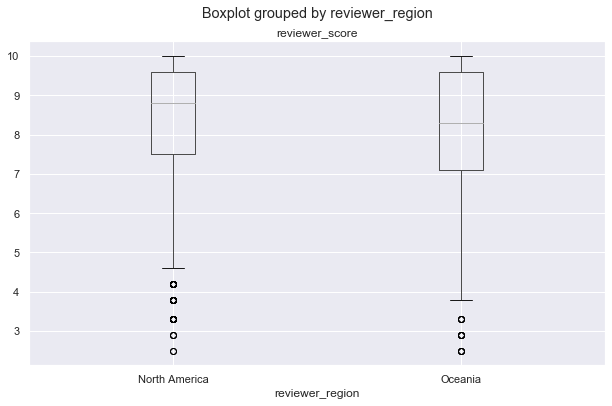

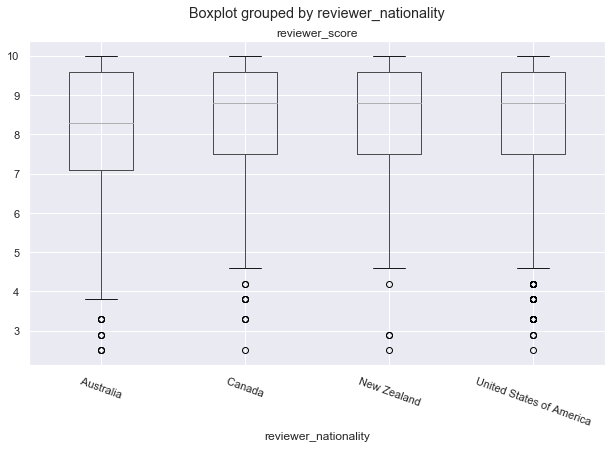

In [13]:
# Grouping countries by region in a new column

countries_grouped = hilton[hilton['reviewer_nationality'].isin([' United States of America ', ' Canada ', ' Australia ', ' New Zealand '])]

countries_grouped = countries_grouped.assign(reviewer_region = countries_grouped['reviewer_nationality'])
countries_grouped.loc[countries_grouped['reviewer_nationality'] == ' United States of America ', 'reviewer_region'] = 'North America'
countries_grouped.loc[countries_grouped['reviewer_nationality'] == ' Canada ', 'reviewer_region'] = 'North America'
countries_grouped.loc[countries_grouped['reviewer_nationality'] == ' Australia ', 'reviewer_region'] = 'Oceania'
countries_grouped.loc[countries_grouped['reviewer_nationality'] == ' New Zealand ', 'reviewer_region'] = 'Oceania'

# Boxplot divided by region

countries_grouped.boxplot('reviewer_score', by = 'reviewer_region', figsize = (10, 6))

# Boxplot divided by separate countries

countries_separate = hilton[hilton['reviewer_nationality'].isin([' United States of America ', ' Canada ', ' Australia ', ' New Zealand '])]
countries_separate.boxplot('reviewer_score', by = 'reviewer_nationality', figsize = (10, 6), rot = -20)


In [14]:
# Setting up Tukey's Honest Significant Differences (HSD) Test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = countries_separate['reviewer_score'],      # Data
                          groups = countries_separate['reviewer_nationality'],   # Groups
                          alpha=0.05)         # Significance level

In [15]:
# Running Tukey's HSD

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Australia,Canada,0.1842,0.2958,-0.0856,0.454,False
Australia,New Zealand,0.2719,0.2007,-0.0834,0.6272,False
Australia,United States of America,0.2961,0.001,0.112,0.4802,True
Canada,New Zealand,0.0877,0.9,-0.3141,0.4895,False
Canada,United States of America,0.1119,0.6712,-0.1511,0.3748,False
New Zealand,United States of America,0.0242,0.9,-0.3259,0.3742,False


Mean US reviewer score: 8.39.
Mean Australian reviewer score: 8.09.


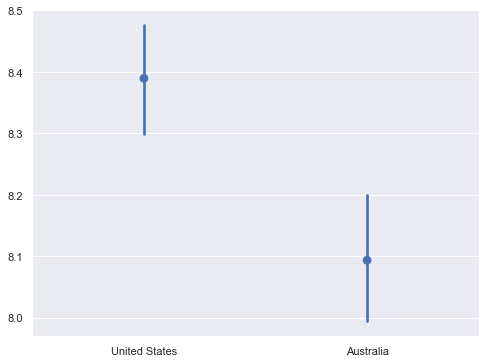

In [16]:
usa = hilton[hilton['reviewer_nationality'].isin([' United States of America '])]
australia = hilton[hilton['reviewer_nationality'].isin([' Australia '])]

l = sns.pointplot(data=[usa['reviewer_score'],
                       australia['reviewer_score']], join=False)

l.set(xticklabels = ['United States', 'Australia']);

print('Mean US reviewer score: {}.'.format(round(countries_separate.loc[countries_separate['reviewer_nationality'] == ' United States of America '].reviewer_score.mean(), 2)))
print('Mean Australian reviewer score: {}.'.format(round(countries_separate.loc[countries_separate['reviewer_nationality'] == ' Australia '].reviewer_score.mean(), 2)))

# 5. Results

Visual inspection of the histogram suggests that review scores are not normally distributed, so I proceeded with the Kruskal-Wallis Test. Based on a p-value of .001, I reject the null that there is no significant difference in mean review scores between North America and English-Speaking Oceania.

The boxplot shows lower median scores and higher inter-quartile score variability for Oceania as compared to North America. The range of scores chosen by Oceania's lower quartile are also lower in comparison to North America's. Evaluating the countries separately, Australia seems to show lower median scores and higher interquartile variablity than the United States, Canada and New Zealand.

The 95% confidence interval computed as a part of Tukey's HSD suggests a statistically significant difference in the average review score between Americans and Australians between 0.112 and 0.4802. The mean reviewer score was 8.39 in the US and 8.09 in Australia. All other differences between the countries evaluated were statistically insignificant.

# 6. Discussion and recommendation

Interestingly, statistically significant review score differences between North America and English-speaking Oceania exist, yet they are the opposite of what I initially expected. Scores are on average higher in the North America group than in the Oceania group. This is driven exclusively by the difference in scores given by Americans (higher) and Australians (lower). 

As a next step in the process, we could examine what specific Hilton hotels Australians and Americans are visiting in Europe, to find out whether there is a difference between those visited by each group. This could be done with A/B testing as well.

If there is a difference in the hotels visited, we could explore the extent to which Hilton and guest-specific standards are being met in the locations most popular with Australian tourists as compared to those popular with American ones. If there is no difference in the the hotels visited, special attention will need to be paid to the written reviews of Australian guests at Hilton or DoubleTree. Whether or not a difference in hotels visited exists, we could use NLP algorithms during this second part of our research to evaluate reviews written by Americans and Australians alike and begin to identify common pain points.

This makes for a non-risky, inexpensive way to follow up on the findings of this research.